In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


# EDA and Data Cleaning/Preprocessing

In [2]:
# import all important libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn

In [3]:
# Read DataSet
dataset = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# use shape function to check the total number rows and columns in our dataset
dataset.shape

(200, 4)

In [5]:
# use info function to about the know about the datatypes 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# find missing values in the form of percentage
(dataset.isnull().sum()/dataset.shape[0])*100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [7]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


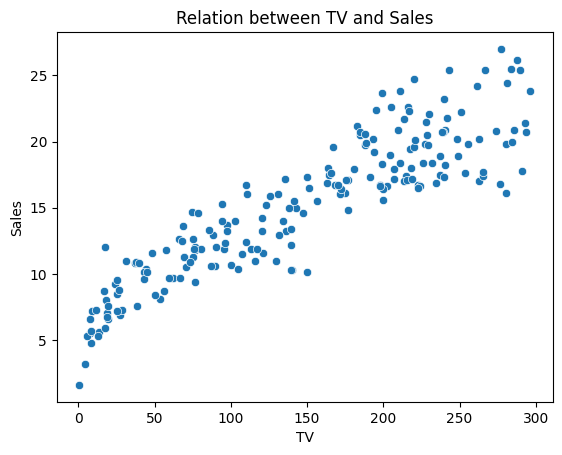

In [8]:
# see the variavles relationships using graphs/plots
sns.scatterplot(x="TV", y="Sales", data=dataset)
plt.title("Relation between TV and Sales")
plt.show()

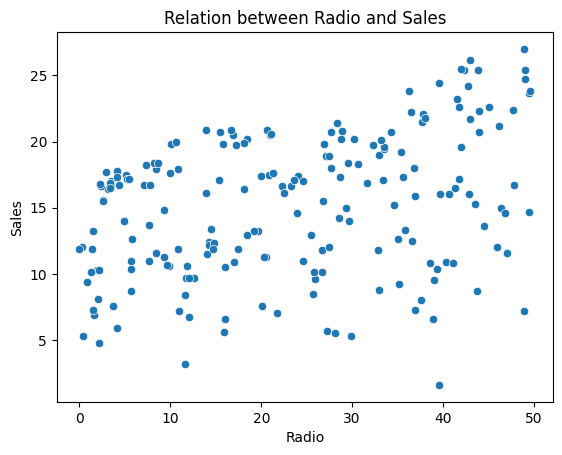

In [9]:
# see the variavles relationships using graphs/plots
sns.scatterplot(x="Radio", y="Sales", data=dataset)
plt.title("Relation between Radio and Sales")
plt.show()

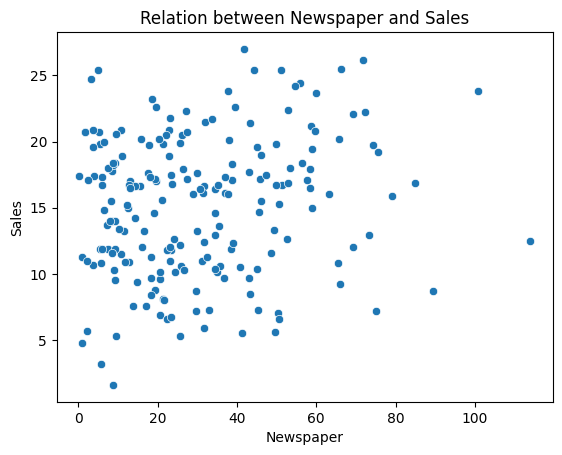

In [10]:
# see the variavles relationships using graphs/plots
sns.scatterplot(x="Newspaper", y="Sales", data=dataset)
plt.title("Relation between Newspaper and Sales")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


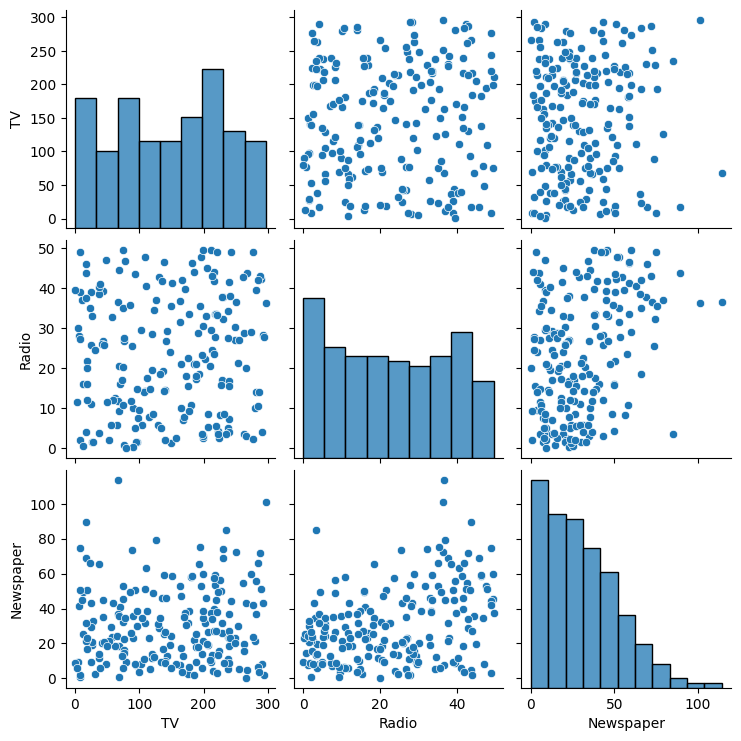

In [11]:
sns.pairplot(dataset[['TV','Radio','Newspaper']])

In [12]:
# checking the outliers 
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Spliting DataSet, Fiting, Training, Selecting Model and Evaluating Model

In [13]:
# here we split the data into x and y
x = dataset[['TV']]
y = dataset['Sales']

In [14]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [16]:
# import libraries and split data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(x_train,y_train)

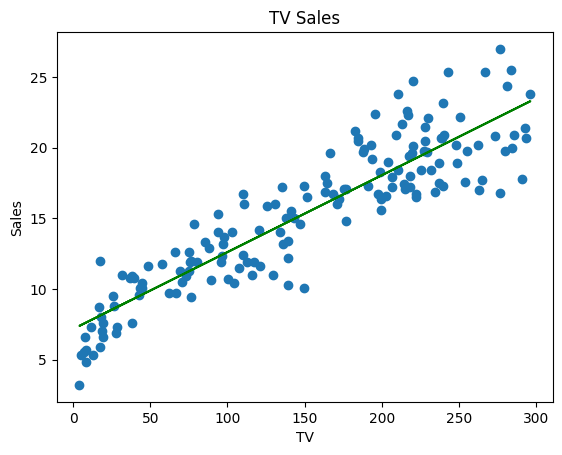

In [18]:
# making plot to check the training of the model
import matplotlib.pyplot as plt 
plt.scatter(x_train,y_train)
plt.plot(x_train, model.predict(x_train),color='green')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title("TV Sales")
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [20]:
model.score(x_train , y_train)

0.8134588121404831

In [21]:
model.score(x_test , y_test)

0.8010943934328406

In [22]:
model.predict([[523]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([35.63141577])

In [23]:
y_pred=model.predict(x_test)
y_pred

array([10.92912965,  9.88399105, 12.08313684, 22.93189318, 16.42699412,
       10.22148373,  7.63585439, 20.23195181,  8.45781235, 17.91849399,
       21.38595901, 11.90894708, 15.68668762, 17.38503783, 11.32105662,
       13.70527904, 21.62002651,  7.20037998, 11.22851831, 18.77855596,
       22.81758114, 14.7994085 , 16.6937222 , 14.33127351, 10.07451111,
       13.86313851, 16.17659633, 18.32130782, 19.35555956,  8.52857694,
       10.85292163, 17.98925858, 22.44198446, 20.3190467 ,  7.88080875,
        8.18019741, 10.40656035, 17.00399772, 10.88558221,  8.52313351])